In [11]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

#Load user trajectory from file into frame
frame = pd.DataFrame()
list_ = []
path =r'C:/Users/shr7abt/Documents/Location/Data/Geolife Trajectories 1.3/Data' # use your path

for x in range(0, 51):
    k = "{0:0=3d}".format(x)
    allFiles = glob.glob(path + "/" + k + "/Trajectory/*.plt")
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, skiprows=6, header = None)
        df['UserName'] = k
        list_.append(df)

frame = pd.concat(list_)

#Add column names
frame.columns = ['Latitude', 'Longitude', '0', 'Altitude', 'NumDays', 'Date', 'Time', 'Username']

#Create timestamp as a columns and index
frame["Timestamp"] = frame["Date"].map(str) + " " + frame["Time"]
frame.Timestamp = pd.to_datetime(frame.Timestamp)
frame.index = pd.to_datetime(frame.Timestamp)

#Add a column with weekday number + weekday name
frame['Weekday'] = frame['Timestamp'].dt.weekday.map(str) + frame['Timestamp'].dt.weekday_name
frame = frame.sort_values(by=['Username', 'Weekday'])

#Create Pivot table for heat map
weeklydf = frame.pivot_table(values='Latitude', index='Username',columns='Weekday',aggfunc=len)

#Create heat map of the users week-wise
colormap = pyplot.cm.cubehelix_r
fig, ax = plt.subplots(figsize=(20,15))  
sns.heatmap(weeklydf, cmap=colormap, linewidths=.5, ax=ax)

,Latitude,Longitude,0,Altitude,NumDays,Date,Time,Username,Timestamp,Weekday
Timestamp,,,,,,,,,,
2009-08-09 08:19:01,39.877460,116.369850,0,52.493438,40034.346539,2009-08-09,08:19:01,050,2009-08-09 08:19:01,6Sunday
2009-08-09 08:19:02,39.877464,116.369843,0,52.493438,40034.346551,2009-08-09,08:19:02,050,2009-08-09 08:19:02,6Sunday
2009-08-09 08:19:05,39.877472,116.369820,0,65.616798,40034.346586,2009-08-09,08:19:05,050,2009-08-09 08:19:05,6Sunday
2009-08-09 08:19:06,39.877480,116.369804,0,68.897638,40034.346597,2009-08-09,08:19:06,050,2009-08-09 08:19:06,6Sunday
2009-08-09 08:19:07,39.877487,116.369789,0,72.178478,40034.346609,2009-08-09,08:19:07,050,2009-08-09 08:19:07,6Sunday


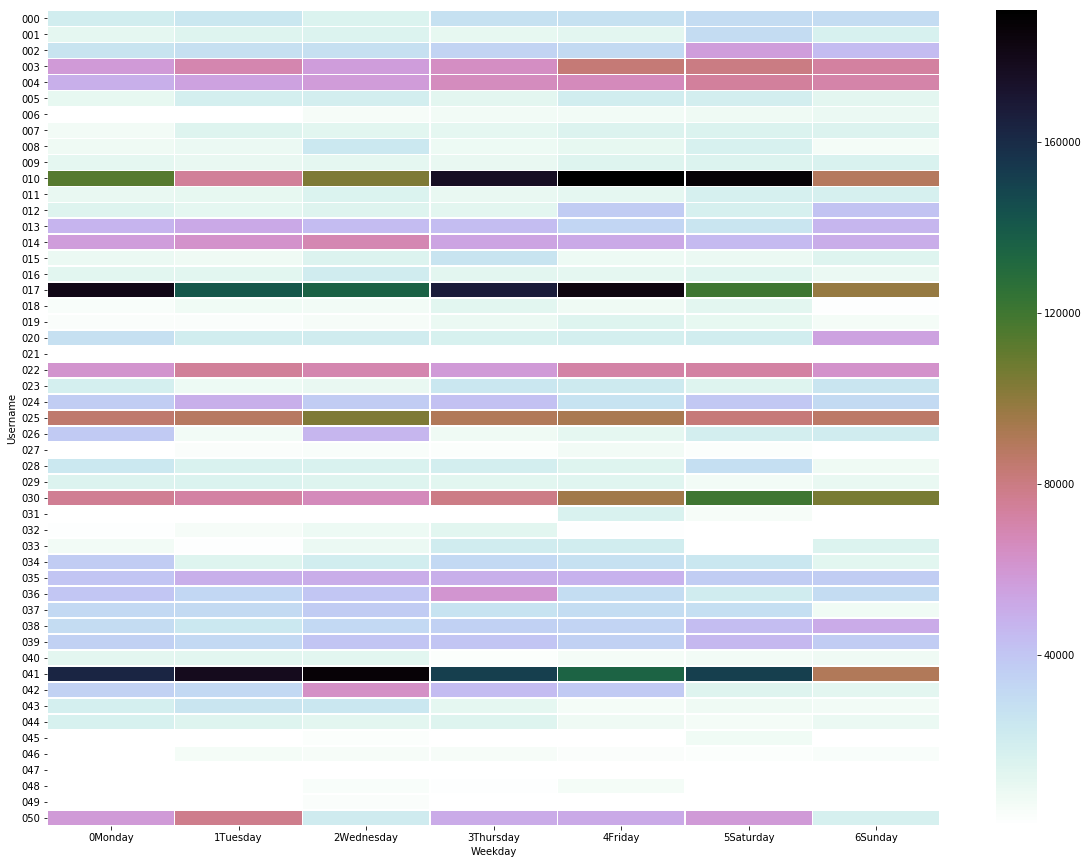

In [12]:
#Create Pivot table for heat map
weeklydf = frame.pivot_table(values='Latitude', index='Username',columns='Weekday',aggfunc=len)

#Create heat map of the users week-wise
colormap = pyplot.cm.cubehelix_r
fig, ax = plt.subplots(figsize=(20,15))  
sns.heatmap(weeklydf, cmap=colormap, linewidths=.5, ax=ax)